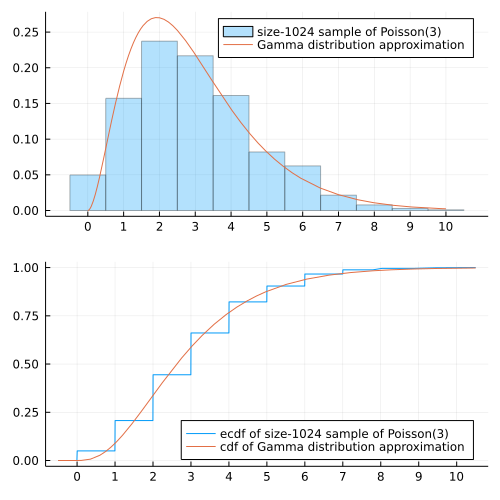

In [1]:
using Plots
using Distributions

"""empirical cumulative distribution function"""
ecdf(sample, x) = count(≤(x), sample)/length(sample)

λ = 3
dist_true = Poisson(λ)
n = 2^10
sample = rand(dist_true, n)
m, u² = mean(sample), var(sample)
gamma = Gamma(m^2/u², u²/m)
a, b = 0, 10

P = plot();
histogram!(sample; norm=true, alpha=0.3,
    bin=a-0.5:b+0.5, xtick=a:b,
    label="size-$n sample of Poisson($λ)");
plot!(x -> pdf(gamma, x), a, b;
    label="Gamma distribution approximation");

Q = plot(; legend=:bottomright, xtick=a:b);
plot!(x -> ecdf(sample, x), a-0.5, b+0.5;
    label="ecdf of size-$n sample of Poisson($λ)");
plot!(x -> cdf(gamma, x), a-0.5, b+0.5;
    label="cdf of Gamma distribution approximation");

plot(P, Q; size=(500, 500), layout=(2, 1))

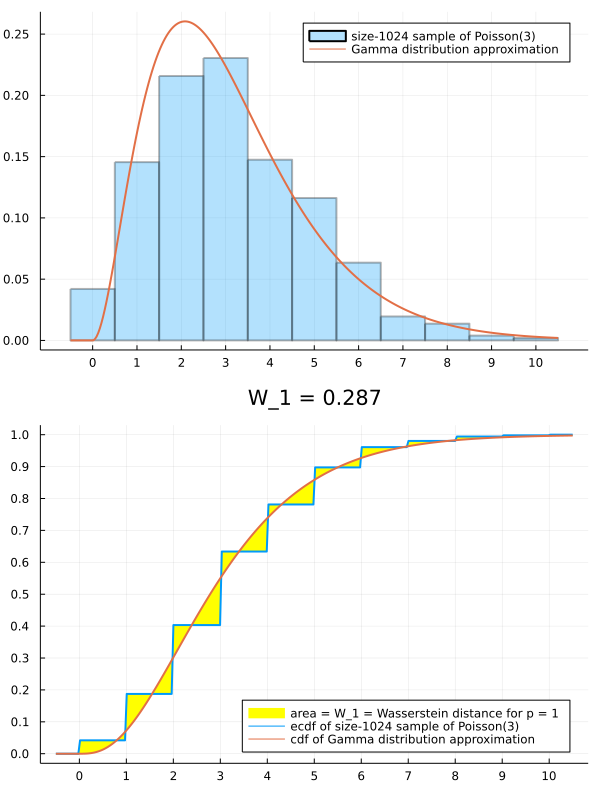

In [2]:
using Plots
using Distributions
using QuadGK

"""empirical cumulative distribution function"""
ecdf(sample, x) = count(≤(x), sample)/length(sample)

λ = 3
dist_true = Poisson(λ)
n = 2^10
sample = rand(dist_true, n)
m, u² = mean(sample), var(sample)
gamma = Gamma(m^2/u², u²/m)

W_1 = quadgk(x -> abs(ecdf(sample, x) - cdf(gamma, x)), 0, Inf)[1]

a, b = 0, 10
xs = range(a-0.5, b+0.5; length=300)
zs = pdf.(gamma, xs)
Ys = ecdf.(Ref(sample), xs)
Zs = cdf.(gamma, xs)

P = plot();
histogram!(sample; norm=true, alpha=0.3, lw=2,
    bin=a-0.5:b+0.5, xtick=a:b,
    label="size-$n sample of Poisson($λ)");
plot!(xs, zs; lw=2,
    label="Gamma distribution approximation");

Q = plot(; legend=:bottomright, xtick=a:b, ytick=0:0.1:1);
plot!(xs, Ys; linealpha = 0, fillrange = Zs, fillcolor = :yellow,
    label="area = W_1 = Wasserstein distance for p = 1");
plot!(xs, Ys; lw = 2, color = 1, 
    label="ecdf of size-$n sample of Poisson($λ)");
plot!(xs, Zs; lw = 2, color = 2,
    label="cdf of Gamma distribution approximation")
title!("W_1 = $(round(W_1; digits=3))")

plot(P, Q; size=(600, 800), layout=(2, 1))

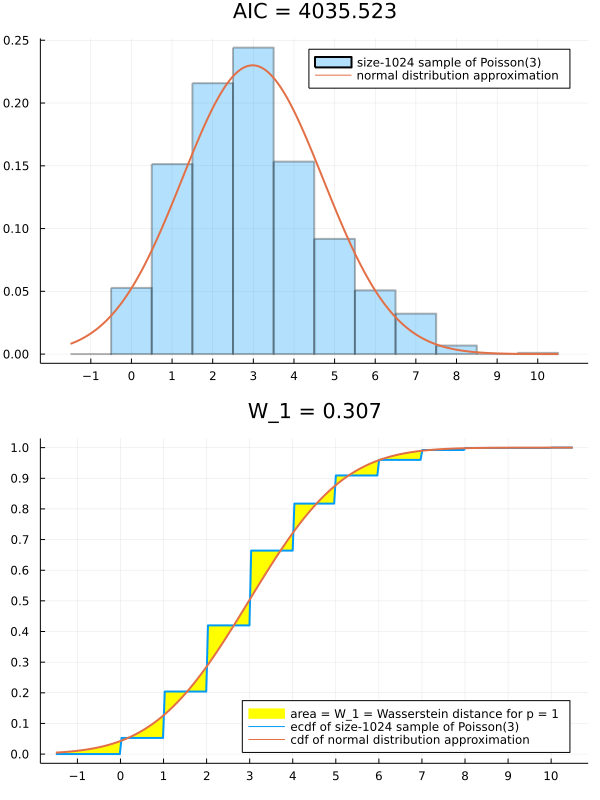

In [3]:
using Plots
using Distributions
using QuadGK

"""empirical cumulative distribution function"""
ecdf(sample, x) = count(≤(x), sample)/length(sample)

λ = 3
dist_true = Poisson(λ)
n = 2^10
sample = rand(dist_true, n)
normal = fit(Normal, sample)

AIC = -2loglikelihood(normal, sample) + 2
W_1 = quadgk(x -> abs(ecdf(sample, x) - cdf(normal, x)), -Inf, Inf)[1]

a, b = -1, 10
xs = range(a-0.5, b+0.5; length=300)
zs = pdf.(normal, xs)
Ys = ecdf.(Ref(sample), xs)
Zs = cdf.(normal, xs)

P = plot();
histogram!(sample; norm=true, alpha=0.3, lw=2,
    bin=a-0.5:b+0.5, xtick=a:b,
    label="size-$n sample of Poisson($λ)");
plot!(xs, zs; lw=2,
    label="normal distribution approximation");
title!("AIC = $(round(AIC; digits=3))");

Q = plot(; legend=:bottomright, xtick=a:b, ytick=0:0.1:1);
plot!(xs, Ys; linealpha = 0, fillrange = Zs, fillcolor = :yellow,
    label="area = W_1 = Wasserstein distance for p = 1");
plot!(xs, Ys; lw = 2, color = 1, 
    label="ecdf of size-$n sample of Poisson($λ)");
plot!(xs, Zs; lw = 2, color = 2,
    label="cdf of normal distribution approximation")
title!("W_1 = $(round(W_1; digits=3))")

plot(P, Q; size=(600, 800), layout=(2, 1))

In [7]:
#\using StatsFuns
AIC = -2loglikelihood(normal, sample) + 2
#S = -2sum((x = count(==(k), sample)/length(sample); xlogy(x, x)) for k in 0:maximum(sample))*length(sample)
S = -2sum((x = pdf(dist_true, k); xlogy(x, x)) for k in 0:20) * n
@show AIC S AIC-S;

AIC = 4035.523099851304
S = 3955.650965189626
AIC - S = 79.87213466167805


In [8]:
KL = -2sum((x = pdf(dist_true, k); y = pdf(normal, k); xlogy(x, y/x)) for k in 0:20) * n

75.42253100440223